In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y 

In [3]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]

    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
   # plt.show()

In [4]:
def decision_boundary(X, y, mean, std, theta):
    positive_indices = np.where(y == 1)[0]
    negative_indices = np.where(y == 0)[0]

    new_X = (X - mean)/std
    plt.scatter(new_X.iloc[positive_indices, 0], new_X.iloc[positive_indices, 1])
    plt.scatter(new_X.iloc[negative_indices, 0], new_X.iloc[negative_indices, 1], marker='x', c= 'red')
    
    t = theta[:,0]
    xms = np.linspace(min(new_X.iloc[:,0]), max(new_X.iloc[:,0]), 50)
    yms = -(t[0] + t[1]*xms)/t[2]
    plt.plot(xms,yms)


In [5]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [7]:
def sigmoid(z):
    #z - вектор стовпець
    g = 1/(1+np.exp(-z))
    return g

In [8]:
def h(X, theta):
    # X - матриця
    # theta - вектор
    z = np.dot(X, theta)
    return sigmoid(z)

In [9]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None

    cost = -y*np.log(h(X,theta)) - (1-y)*np.log(1-h(X,theta))
    J = np.sum(cost)/m
    return J

In [10]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    d_theta = np.dot(X.T, h(X,theta) - y) / m
    
    return d_theta

In [11]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters):
    m = X.shape[0]
    J_history = [cost_function(X, y, theta)]

    for i in range(num_iters):
        delta = derivative_theta(X, y, theta)
        theta = theta - alpha*delta
        J_history.append(cost_function(X, y, theta))
        
        if abs(cost_function(X,y,theta)-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [12]:
def predict(X, mean, std, theta):
    predictions = h(prepare_X((X - mean.values)/std.values), theta)
    return predictions

In [13]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

FileNotFoundError: [Errno 2] No such file or directory: 'sats.csv'

In [ ]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
# data_columns = ["test1", "test2"]
# target_column = "passed"
# X, y = load_datasets('tests.csv', data_columns, target_column)
# print('Training set: X={}, y={}'.format(X.shape, y.shape))

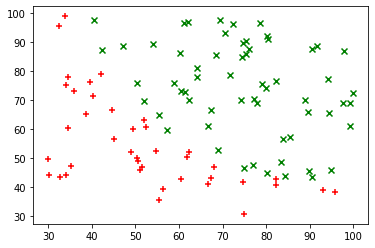

In [ ]:
plot_data(X, y)

In [ ]:
X_new, mean, std = normalize(X)

In [ ]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [ ]:
theta = np.zeros((X_new.shape[1], 1))

In [ ]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [ ]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 1000000)
print(new_theta, len(Js))

[[1.56194524]
 [3.67803433]
 [3.419974  ]] 24856


In [ ]:
cost_function(X_new, y_new, new_theta)

0.2042453327980325

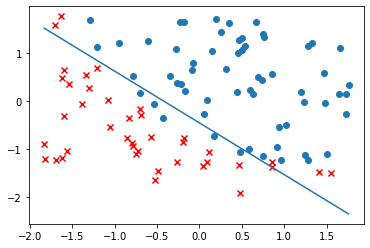

In [ ]:
decision_boundary(X, y, mean, std, new_theta)

In [ ]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

[[3.00043126e-04]
 [5.67131247e-01]]
